In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv(r"C:\Users\MY BOOK\OneDrive\Documents\Data analytics\nikhil analytics\class\Python\Python part 3 ML\proj\creditcard.csv")

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.shape

(284807, 31)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#  Finding missing values for each variables.

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions:",fraud_percent)

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727485630620034


In [16]:
# Observe that the data is not balanced.

In [17]:
# Scaling the column 'Amount' 
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

In [18]:
# dropping the original Amount column and adding a new column with the scaled values.
# We also drop the Time column as it is irrelevant  

data.drop(['Amount', 'Time'], inplace= True, axis= 1)

In [19]:
# Removing duplicate entries
data.drop_duplicates(inplace=True)

In [20]:
#Selecting the features and targets

X = data.drop(['Class'], axis= 1)      
Y = data['Class']

In [21]:
# Split data into train(70%) and test(30%)   

train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=7)

In [23]:
lg_model = LogisticRegression().fit(train_x,train_y)
pred_y = lg_model.predict(test_x)

In [24]:
# predict for test data using derived model

pred_y = lg_model.predict(test_x)

In [27]:
print(accuracy_score(pred_y,test_y))

0.9990568205177813


In [30]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82593
           1       0.60      0.82      0.69       106

    accuracy                           1.00     82699
   macro avg       0.80      0.91      0.85     82699
weighted avg       1.00      1.00      1.00     82699



In [31]:
#The precision of the minority class(1) in very less. It proves that the model is more biased towards majority class(0). 

# Employ SMOTE to make the data balanced

In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(train_y == 0)))

Before OverSampling, counts of label '1': 327
Before OverSampling, counts of label '0': 192637


In [33]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res =sm.fit_resample(train_x,train_y)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} '.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (385274, 29)
After OverSampling, the shape of train_y: (385274,) 
After OverSampling, counts of label '1': 192637
After OverSampling, counts of label '0': 192637


In [49]:
# Logistic Regression

lg_model = LogisticRegression().fit(X_train_res, y_train_res) 
pred_y = lg_model.predict(test_x)       
y_score_1 = lg_model.predict_proba(test_x)[:, 1]
average_precision = average_precision_score(test_y, y_score_1)
print(average_precision)
precision_1, recall_1, _ = precision_recall_curve(test_y, y_score_1)

0.7314370089432719


In [50]:
# Random Forest Algorithm

rf_model  = RandomForestClassifier(criterion="entropy",n_estimators=50).fit(X_train_res, y_train_res)
pred_y = rf_model.predict(test_x)
y_score_2 = rf_model.predict_proba(test_x)[:, 1]
average_precision = average_precision_score(test_y, y_score_2)
print(average_precision)

precision_2, recall_2, _ = precision_recall_curve(test_y, y_score_2)
#disp = plot_precision_recall_curve(rf_model,test_x,test_y)

0.8151689173596068


In [51]:
# KNN - Kth Nearest Neighbour

knn_model  = KNeighborsClassifier(n_neighbors=1).fit(X_train_res, y_train_res)
pred_y = knn_model.predict(test_x)
y_score_3 = knn_model.predict_proba(test_x)[:, 1]
average_precision = average_precision_score(test_y, y_score_3)

precision_3, recall_3, _ = precision_recall_curve(test_y, y_score_3)
print(average_precision)

0.613162917481617


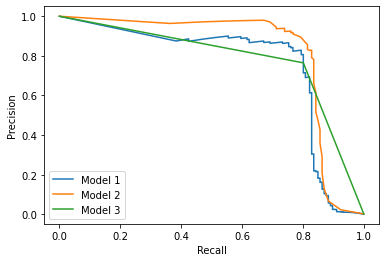

In [52]:



# plot the precision-recall curves for each model
plt.plot(recall_1, precision_1, label='Model 1')
plt.plot(recall_2, precision_2, label='Model 2')
plt.plot(recall_3, precision_3, label='Model 3')

# set the axis labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# display the plot
plt.show()


In [ ]:

# Conclusion

# Random forest algorithm gives perfect model for prediction because average precision score is high for
# this algorithm when compared to other algorithms applied.It give average precision of 0.83.